In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>" 

In [9]:


titanic_data = pd.read_csv('C:\\programmer_shit\\data_salo_files\\goshko_csv_files\\titanic_train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
test_df = pd.read_csv('C:\\programmer_shit\\data_salo_files\\kaggle\\test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,1
888,3,28.0,1,2,23.4500,0,0,0,1
889,1,26.0,0,0,30.0000,1,1,0,0


In [11]:
X = titanic_data.drop(["PassengerId" , "Survived","Name", "Ticket", "Cabin"] , axis = 1)
X = pd.get_dummies(X)
X = X.drop(["Sex_female"] , axis = 1)
X = X.fillna({"Age": X.Age.median()})
X.isnull().sum()
y = titanic_data.Survived

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [22]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,1
888,3,28.0,1,2,23.4500,0,0,0,1
889,1,26.0,0,0,30.0000,1,1,0,0


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(titanic_data["Embarked"])


array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state = 42)
model.fit(X)


KMeans(n_clusters=2, random_state=42)

In [8]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [9]:
X["cluster"] = model.labels_

X.groupby('cluster').mean()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
cluster,,,,,,,,,
0,1.000000,31.583396,0.660377,0.886792,187.032858,0.358491,0.547170,0.000000,0.452830
1,2.391408,29.221062,0.514320,0.349642,22.411942,0.665871,0.165871,0.091885,0.739857


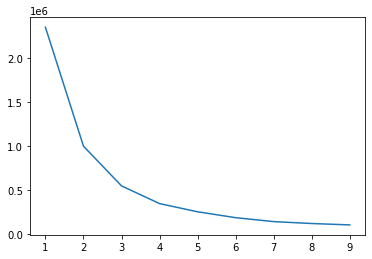

In [15]:
k = range(1,10)
models = [KMeans(n_clusters = i, random_state = 42).fit(X) for i in k]
dist = [m.inertia_ for m in models]

plt.plot(k, dist)

In [14]:
KMeans(n_clusters = 3, random_state = 42).fit(X)

KMeans(n_clusters=3, random_state=42)

In [61]:
clf = tree.DecisionTreeClassifier(criterion="entropy" , max_depth =3, min_samples_split = 5 , min_samples_leaf = 10)


In [14]:
y = titanic_data.Survived

In [63]:
clf.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=5)

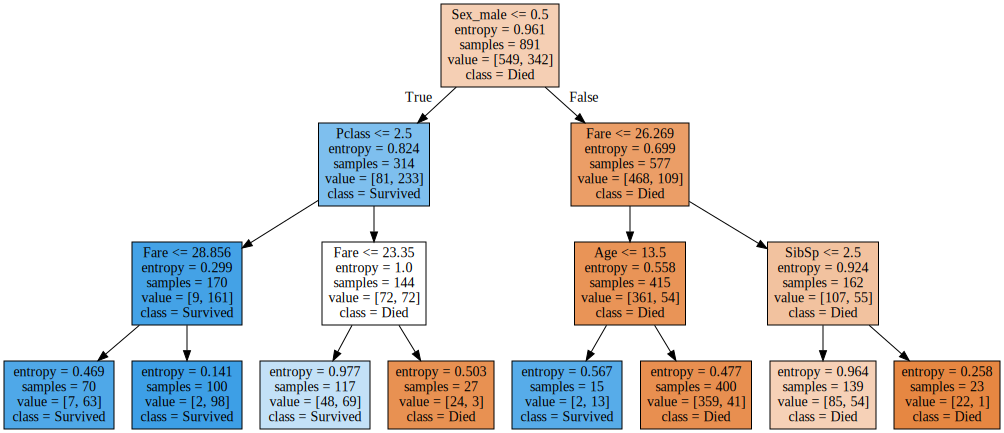

In [64]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X_train),
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
clf.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=5)

In [65]:
from sklearn.metrics import roc_auc_score
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))


roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8286516853932584
0.7988826815642458


0.8793436293436293

In [18]:
clf.predict_proba(X_test)[:, 1]

array([0.14649682, 0.14649682, 0.14649682, 1.        , 0.58441558,
       0.95774648, 0.58441558, 0.14649682, 0.58441558, 1.        ,
       0.45945946, 0.14649682, 0.        , 0.14649682, 0.14649682,
       1.        , 0.45945946, 0.58441558, 0.14649682, 0.        ,
       0.14649682, 0.14649682, 0.58441558, 0.14649682, 0.14649682,
       0.14649682, 0.14649682, 0.14649682, 0.14649682, 0.58441558,
       0.14649682, 0.58441558, 0.14649682, 0.58441558, 0.14649682,
       0.14649682, 0.14649682, 0.58441558, 0.95774648, 0.14649682,
       0.        , 0.14649682, 0.14649682, 0.14649682, 0.        ,
       0.14649682, 0.14649682, 0.14649682, 0.14649682, 0.45945946,
       0.58441558, 0.95774648, 0.14649682, 0.45945946, 0.14649682,
       1.        , 0.14649682, 0.95774648, 0.95774648, 0.58441558,
       0.14649682, 1.        , 0.95774648, 0.14649682, 0.14649682,
       0.95774648, 0.45945946, 0.14649682, 0.14649682, 0.95774648,
       0.95774648, 1.        , 0.14649682, 0.95774648, 0.14649

In [14]:
clf.score(X_test,y_test)

0.823728813559322

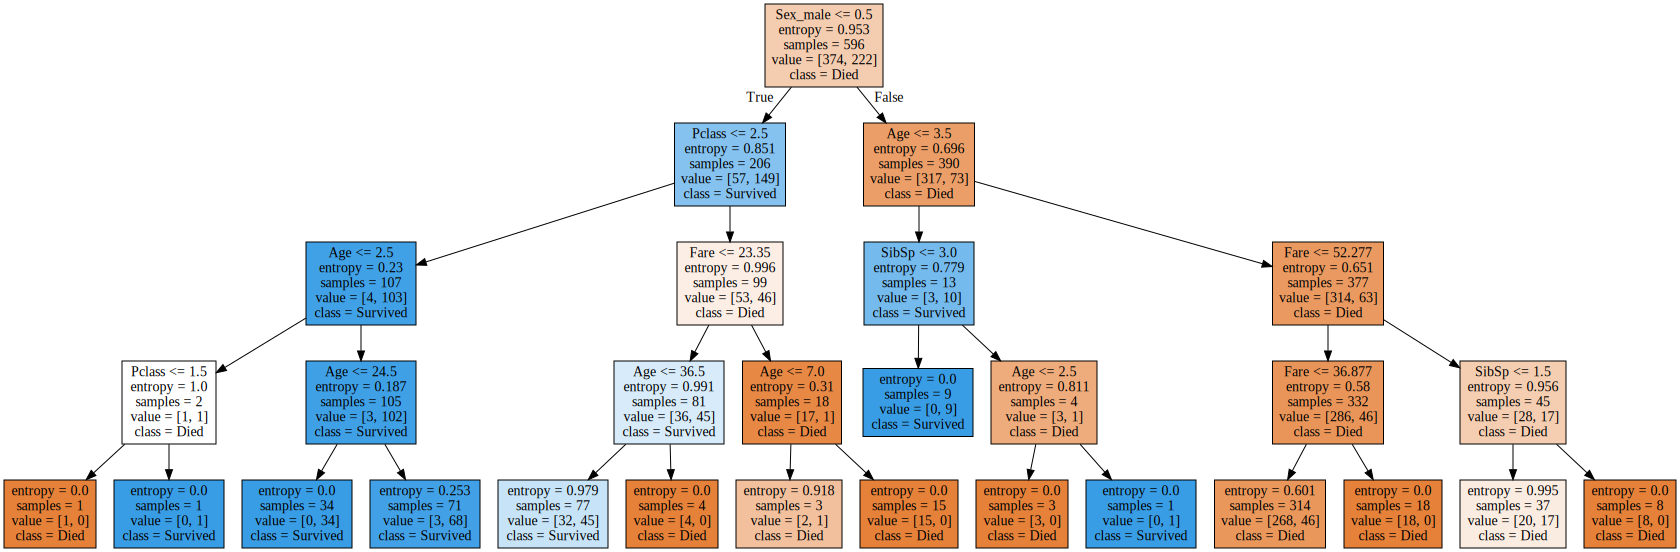

In [11]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X_train),
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [12]:
max_depth_values = range(1,50)

score_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score], 
                                   'cross_val_score' : [mean_cross_val_score]})
    
    score_data = score_data.append(temp_score_data)

NameError: name 'cross_val_score' is not defined

In [17]:
score_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.793669


In [18]:
score_data_long = pd.melt(score_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'] , var_name = 'set_type', value_name = 'score')
score_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
142,45,cross_val_score,0.766821
143,46,cross_val_score,0.775224
144,47,cross_val_score,0.780266
145,48,cross_val_score,0.771863


max_depth                 10
set_type     cross_val_score
score               0.805392
Name: 107, dtype: object

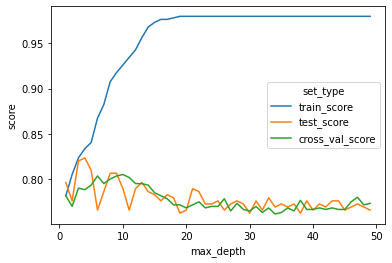

In [19]:
sns.lineplot(x = 'max_depth' , y = 'score', hue = 'set_type', data = score_data_long)
score_data_long.iloc[score_data_long[score_data_long.set_type == "cross_val_score"]["score"].idxmax()]

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


cross_val_score(clf, X_train, y_train, cv=5).mean()


0.7819607843137255

In [23]:

clf = tree.DecisionTreeClassifier()

params = {'criterion' : ['entropy'], 'max_depth' : range(1,20)}
tree_search = GridSearchCV(clf, params , cv = 5)
tree_search.fit(X_train,y_train)
best_tree = tree_search.best_estimator_
best_tree.score(X_train ,y_train)
best_tree.score(X_test,y_test)

0.8033898305084746

In [ ]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X_train),
class_names=["healthy", 'unhealthy'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [18]:
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))

k-NN accuracy for test set: 0.703911


In [19]:
from sklearn.preprocessing import scale

Xs = scale(X)

from sklearn.model_selection import train_test_split

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.2, random_state = 42)



In [41]:
Xs

array([[ 0.82737724, -0.56573646,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.66386103,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.25833709, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61930636],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724,  0.20276197, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.61470971]])

In [47]:
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=41)
knn_model_2 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))

k-NN score for test set: 0.810056
k-NN score for training set: 0.841292


In [29]:
Xs[:,0]

array([ 0.82737724, -1.56610693,  0.82737724, -1.56610693,  0.82737724,
        0.82737724, -1.56610693,  0.82737724,  0.82737724, -0.36936484,
        0.82737724, -1.56610693,  0.82737724,  0.82737724,  0.82737724,
       -0.36936484,  0.82737724, -0.36936484,  0.82737724,  0.82737724,
       -0.36936484, -0.36936484,  0.82737724, -1.56610693,  0.82737724,
        0.82737724,  0.82737724, -1.56610693,  0.82737724,  0.82737724,
       -1.56610693, -1.56610693,  0.82737724, -0.36936484, -1.56610693,
       -1.56610693,  0.82737724,  0.82737724,  0.82737724,  0.82737724,
        0.82737724, -0.36936484,  0.82737724, -0.36936484,  0.82737724,
        0.82737724,  0.82737724,  0.82737724,  0.82737724,  0.82737724,
        0.82737724,  0.82737724, -1.56610693, -0.36936484, -1.56610693,
       -1.56610693, -0.36936484,  0.82737724, -0.36936484,  0.82737724,
        0.82737724, -1.56610693, -1.56610693,  0.82737724, -1.56610693,
        0.82737724, -0.36936484,  0.82737724,  0.82737724,  0.82

In [36]:
np.unique(Xs[:,-2])

array([-0.30756234,  3.25137334])

In [40]:
from sklearn.preprocessing import scale

Xs_nums = scale(X[["Age" , "Fare" , "SibSp","Parch" ]])
Xs_categories = np.array(X[["Pclass" , "Sex_male" ,  "Embarked_C" , "Embarked_Q" , "Embarked_S"]])

Xs_2 = np.concatenate((Xs_nums, Xs_categories), axis=1)
Xs_2


array([[-0.56573646, -0.50244517,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.78684529,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.48885426, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 , -0.17626324,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.04438104, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.49237783, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [42]:
from sklearn.model_selection import train_test_split

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs_2, y, test_size = 0.2, random_state = 42)

In [43]:
knn_model_3 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_3.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_3.score(Xs_train, y_train))

k-NN score for test set: 0.798883
k-NN score for training set: 0.853933
